In [2]:
import pymysql.cursors
connection = pymysql.connect(host='localhost',
                                     user='root',
                                     password='XvX-313VC',
                                     db='samlogs',
                                     charset='utf8mb4',
                                     cursorclass=pymysql.cursors.DictCursor,
                                     autocommit=True)

#try: 
with connection.cursor() as cursor:
    print(cursor.execute("SELECT distinct invalid_reason FROM samlogs.directedgraphs"))

project_path = "C:\work\graphs\Code_Clubs\\";
project_folder = "samia_morsecode_03102017";
parameters = ('76214924-cd7f-4271-a9f3-ed8fab168e68',);
#finally:
   # connection.close()

12


In [3]:
with connection.cursor() as cursor:
    cursor.execute("SELECT projectID,stateID,path_id,path_label,valid,ID,progressing_path_ID FROM directedgraphs where projectID = %s", parameters);
    result_paths = cursor.fetchall();
    print(len(result_paths));

172


In [4]:
with connection.cursor() as cursor:
    cursor.execute("SELECT projectID,stateID,timeCreated,nodeID,nodeName FROM samlogs.nodes WHERE projectID = %s ORDER BY timeCreated", parameters);
    result_nodes = cursor.fetchall();
    print(len(result_nodes));

554


In [5]:
with connection.cursor() as cursor:
    cursor.execute("SELECT projectID, stateID, fromID, toID, CONCAT(fromID, '->', toID) as fulledge FROM samlogs.edges WHERE projectID = %s ORDER BY timeCreated", parameters);
    result_edges = cursor.fetchall();
    print(len(result_edges));

444


In [6]:
with connection.cursor() as cursor:
    cursor.execute("SELECT DISTINCT fromID, toID, CONCAT(fromID, '->', toID) as fulledge FROM samlogs.edges WHERE projectID = %s ORDER BY timeCreated", parameters);
    result_unique_edges = cursor.fetchall();
    print(len(result_unique_edges));

26


In [7]:
with connection.cursor() as cursor_time:
    cursor_time.execute("SELECT DISTINCT timeCreated, directedgraphs.stateID FROM samlogs.directedgraphs JOIN samlogs.nodes ON directedgraphs.stateID = nodes.stateID WHERE directedgraphs.projectID = %s ORDER BY timeCreated", parameters);
    result_statetime = cursor_time.fetchall();
    print(len(result_statetime));

71


In [8]:
unique_timeCreated = [ item['timeCreated'] for item in result_statetime ]
unique_timeCreated.sort();
#print (unique_timeCreated);
print(result_statetime[len(result_statetime)-1]['stateID']);

ObjectId(59d39d2f0dbe4d3d0a292e56)


In [9]:
final_state_edges = [item['fulledge'] for item in result_edges if item['stateID'] == result_statetime[len(result_statetime)-1]['stateID']];
print(len(final_state_edges))

10


In [28]:
unique_state_edges_order = [];
unique_state_edgeblocks = [];
up = 0; down = 0;

for edge in result_unique_edges:
    fromNodeID = edge['fromID']; toNodeID = edge['toID'];
    fromNodeName = [item['nodeName'] for item in result_nodes if item['nodeID'] == fromNodeID];
    toNodeName = [item['nodeName'] for item in result_nodes if item['nodeID'] == toNodeID];
    fullEdgeName = str(fromNodeName[0]) + '->' + str(toNodeName[0]);
    
    if edge['fulledge'] in final_state_edges:        
        unique_state_edges_order.append(edge['fulledge']);
        unique_state_edgeblocks.append(fullEdgeName);
        up = up + 1;
    else: 
        unique_state_edges_order.insert(0,edge['fulledge']);
        unique_state_edgeblocks.insert(0,fullEdgeName);
        down = down + 1;
        
print(unique_state_edges_order);
print(unique_state_edgeblocks);
print(down); print(up);

['1fa96bf5-9f38-4ab1-91e3-fa86d9613cbd->670d008d-f187-45b9-9ac1-1634a4e31eae', '45771a77-ec43-4441-9ae4-f1e289cb5c20->37cc7b0f-bdef-4e20-9ae2-d0bf550883f0', '458bdb8d-3cc3-4af6-b035-a4866e821e32->5f2b51ac-51f7-427c-b5d5-d05ac9d2cd30', '1fa96bf5-9f38-4ab1-91e3-fa86d9613cbd->458bdb8d-3cc3-4af6-b035-a4866e821e32', '458bdb8d-3cc3-4af6-b035-a4866e821e32->3cca9c79-bbf4-4336-9de5-3a6e3fa1e746', '7f88e177-e497-43a9-b975-3a4ab18bb440->458bdb8d-3cc3-4af6-b035-a4866e821e32', '5f2b51ac-51f7-427c-b5d5-d05ac9d2cd30->7f88e177-e497-43a9-b975-3a4ab18bb440', '1fa96bf5-9f38-4ab1-91e3-fa86d9613cbd->5f2b51ac-51f7-427c-b5d5-d05ac9d2cd30', '45771a77-ec43-4441-9ae4-f1e289cb5c20->4400e7f6-b395-4b29-9758-623168e1a646', '4400e7f6-b395-4b29-9758-623168e1a646->45771a77-ec43-4441-9ae4-f1e289cb5c20', '45771a77-ec43-4441-9ae4-f1e289cb5c20->670d008d-f187-45b9-9ac1-1634a4e31eae', '45771a77-ec43-4441-9ae4-f1e289cb5c20->3cca9c79-bbf4-4336-9de5-3a6e3fa1e746', '7f88e177-e497-43a9-b975-3a4ab18bb440->45771a77-ec43-4441-9ae4-

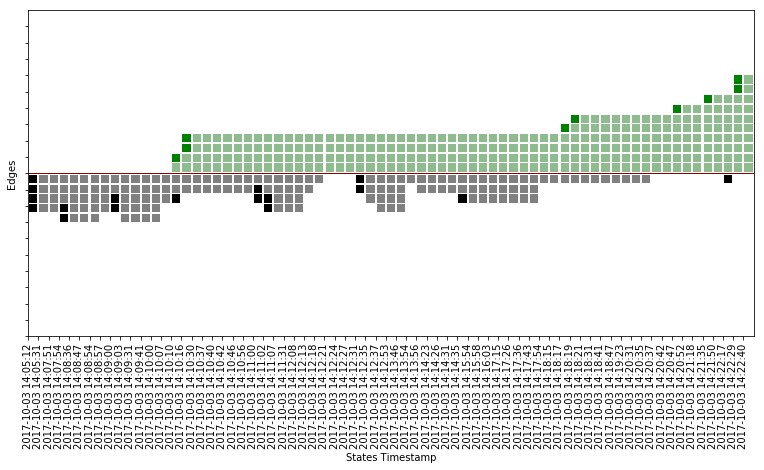

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13,6))
plt.xticks(rotation=90)
plt.axhline(linewidth=1, color='darkred')
#ax.grid(True);

ax.set_ylim(-len(final_state_edges) * 10, len(final_state_edges) * 10);
ax.set_yticks(np.arange(-len(final_state_edges) * 10, len(final_state_edges) * 10, 10));
ax.set_yticklabels('');
ax.set_ylabel('Edges');

ax.set_xlim(0, len(unique_timeCreated)*10);
ax.set_xticks(np.arange(0, len(unique_timeCreated)*10, 10));
ax.set_xticklabels(unique_timeCreated);
ax.set_xlabel('States Timestamp');

x = 1; 

for i in range(0,len(result_statetime)):
    yp = 1; yn= -1;
    x_range = (x, 8);
    for edgeitem in result_edges:
            if edgeitem['stateID'] == result_statetime[i]['stateID']:
                finaledge = True;
                existingedge = False;
                for j in range(i+1,len(result_statetime)):
                    state_edges = [item['fulledge'] for item in result_edges if item['stateID'] == result_statetime[j]['stateID']];
                    if edgeitem['fulledge'] not in state_edges:
                        finaledge = False;
                        break;
                for j in range(0,i):
                    state_edges = [item['fulledge'] for item in result_edges if item['stateID'] == result_statetime[j]['stateID']];
                    if edgeitem['fulledge'] in state_edges:
                        existingedge = True;
                        break;
                if finaledge:
                    if existingedge:
                        yp_range = (yp, 5);
                        yp = yp + 6;    
                        ax.broken_barh([x_range],yp_range,facecolors='darkseagreen');
                    else:
                        yp_range = (yp, 5);
                        yp = yp + 6;    
                        ax.broken_barh([x_range],yp_range,facecolors='green');
                else:
                    if existingedge:
                        yn_range = (yn, -5);
                        yn = yn - 6;    
                        ax.broken_barh([x_range],yn_range,facecolors='grey');
                    else:
                        yn_range = (yn, -5);
                        yn = yn - 6;    
                        ax.broken_barh([x_range],yn_range,facecolors='black');
    x = x + 10;


image_file = project_path + project_folder + '\\' + 'Volume of kept & discarded edges' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show();


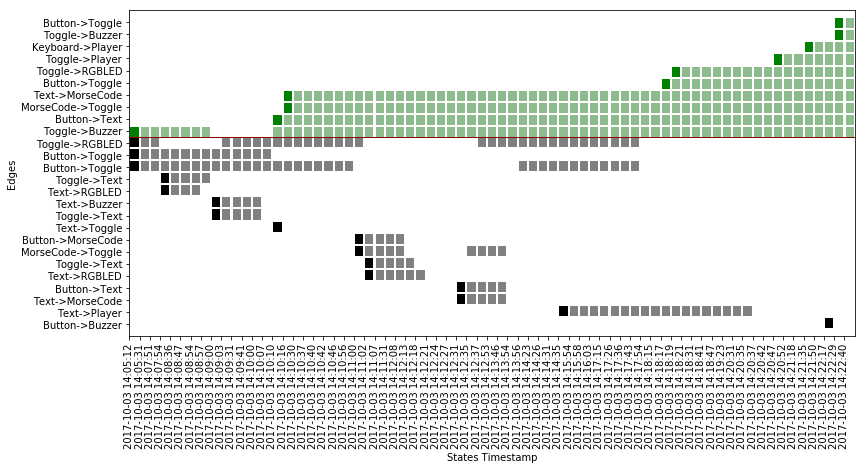

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13,6))
plt.xticks(rotation=90)
plt.axhline(linewidth=1, color='darkred')
#ax.grid(True);

ax.set_ylim(-(down*6)-3, up*6+3);
ax.set_yticks(np.arange(-(down*6)+3, up*6+3, 6));
ax.set_yticklabels(unique_state_edgeblocks);
ax.set_ylabel('Edges');

ax.set_xlim(0, len(unique_timeCreated)*10);
ax.set_xticks(np.arange(0, len(unique_timeCreated)*10, 10));
ax.set_xticklabels(unique_timeCreated);
ax.set_xlabel('States Timestamp');

x = 1; 

for i in range(0,len(result_statetime)):
    x_range = (x, 8);
    for edgeitem in result_edges:
            if edgeitem['stateID'] == result_statetime[i]['stateID']:
                finaledge = True;
                existingedge = False;
                for j in range(i+1,len(result_statetime)):
                    state_edges = [item['fulledge'] for item in result_edges if item['stateID'] == result_statetime[j]['stateID']];
                    if edgeitem['fulledge'] not in state_edges:
                        finaledge = False;
                        break;
                for j in range(0,i):
                    state_edges = [item['fulledge'] for item in result_edges if item['stateID'] == result_statetime[j]['stateID']];
                    if edgeitem['fulledge'] in state_edges:
                        existingedge = True;
                        break;
                        
               # if finaledge:
                if edgeitem['fulledge'] in final_state_edges:
                    yp_range = ((unique_state_edges_order.index(edgeitem['fulledge'])-down)*6, 5);
                    if existingedge:                 
                        ax.broken_barh([x_range],yp_range,facecolors='darkseagreen');
                    else:
                        ax.broken_barh([x_range],yp_range,facecolors='green');
                else:
                    yn_range = ((unique_state_edges_order.index(edgeitem['fulledge'])+1-down)*6, -5);
                    if existingedge:   
                        ax.broken_barh([x_range],yn_range,facecolors='grey');
                    else:
                        ax.broken_barh([x_range],yn_range,facecolors='black');
    x = x + 10;


image_file = project_path + project_folder + '\\' + 'Specific kept/discarded edges' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show();

# Observe:
# the distribution of the edges that remain in the final graph - when do they get implemented - eg: most of them appear at the end of the project, or there's an even progresion of additions of edge that remain in hte final graph, or a lot of them get added at the beginning and persist
# the persistance of 'discarded' edges. the timeline of their appearance. the variety.
# how many of the edges that appear in the final graph are first discarded & re-introduced? eg: the toggle-> buzzer, toggle-RGB led? etc.
# what gets discarded doesn't persist long - problem-solving